## Article : Audio Source Separation Using Non-Negative Matrix Factorization (NMF)
https://medium.com/@zahrahafida.benslimane/audio-source-separation-using-non-negative-matrix-factorization-nmf-a8b204490c7d

S√©paration de sources sonores, une technique qui permet d‚Äôisoler diff√©rentes sources sonores pr√©sentes dans un m√©lange de sons. Cette m√©thode a plusieurs applications, notamment :

- la s√©paration musicale (par exemple, isoler les instruments d‚Äôune chanson pour les remixer),

- la s√©paration de la parole (identifier diff√©rents locuteurs dans un enregistrement),

- et l‚Äôam√©lioration de la parole (s√©parer la voix du bruit de fond ou de la musique).

L‚Äôarticle pr√©sente une m√©thode simple pour r√©soudre ce probl√®me de s√©paration audio, et propose un programme Python permettant d‚Äôextraire les notes jou√©es dans une courte s√©quence de piano.

![Texte alternatif](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*3ZHtbPx95Q1BNkOS4WQvGA.png)


Ce probl√®me, connu sous le nom de "Cocktail Party Problem", est aujourd‚Äôhui majoritairement abord√© √† l‚Äôaide de m√©thodes d‚Äôapprentissage profond.

Cependant, ici, on va utiliser une approche plus classique et simple.

L‚Äôun des algorithmes les plus populaires pour ce type de t√¢che en traitement du signal est la Factorisation en Matrices Non-N√©gatives (NMF), une m√©thode rendue c√©l√®bre par les travaux de Daniel D. Lee et H. Sebastian Seung.

### Principe de la NMF :

L‚Äôobjectif est de factoriser une matrice de donn√©es V (connue) en deux matrices inconnues W et H, toutes deux non-n√©gatives, telles que :

![Texte alternatif](https://miro.medium.com/v2/resize:fit:182/format:webp/1*5hrG-mw3dPrJnYHfXlhsqg.png)

Ce qui distingue la NMF d‚Äôautres m√©thodes comme la PCA (analyse en composantes principales), c‚Äôest cette contrainte de non-n√©gativit√©, qui rend les r√©sultats souvent plus interpr√©tables, notamment dans les signaux audio.

![Texte alternatif](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*r7JKOWSutM3fasmBQotBGQ.png)

### Application √† la s√©paration de sources sonores :

- V repr√©sente le spectrogramme du signal audio (repr√©sentation temps-fr√©quence).

- W est le dictionnaire des motifs sonores (√©l√©ments de base du signal).

- H contient les activations de ces motifs dans le temps.

Si V est de taille K √ó N, alors :

- W est de taille K √ó S,

- H est de taille S √ó N, o√π S correspond au nombre de sources √† extraire (aussi appel√© le rang de la factorisation).

![Texte alternatif](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*sQ-EVH2gtSmz3o4rgpy3YA.png)

### M√©thode d‚Äôoptimisation :

Pour obtenir une bonne reconstruction de V, on optimise une fonction de co√ªt afin de trouver les meilleures matrices W et H, en minimisant l‚Äôerreur entre V et l‚Äôestimation W√óH, souvent par descente de gradient.

![Texte alternatif](https://miro.medium.com/v2/resize:fit:640/format:webp/1*ZgHa0vfFRGj3s6MJ5JW1jQ.png)

### Cost functions

On peut utiliser plusieurs fonctions de co√ªt pour optimiser la NMF, mais cet article s‚Äôint√©resse √† une famille de mesures statistiques appel√©es divergences Œ≤, d√©finies comme suit :

- Pour Œ≤ = 0, on obtient la divergence Itakura-Saito (IS).

- Pour Œ≤ = 1, cela donne la divergence de Kullback-Leibler g√©n√©ralis√©e (KL).

![Texte alternatif](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*bOSREuHGVXDceU7Sl56qsg.png)

- Et pour Œ≤ = 2, on obtient un co√ªt quadratique (√©quivalent √† l‚Äôerreur quadratique classique).

![Texte alternatif](https://miro.medium.com/v2/resize:fit:390/format:webp/1*bWLrsnGMVZbfVEZ1-DfQ5A.png)

### Algorithme de descente de gradient

En math√©matiques, la descente de gradient est un algorithme d‚Äôoptimisation it√©ratif de premier ordre, utilis√© pour trouver un minimum local d‚Äôune fonction d√©rivable.

Dans notre cas :

On note Œ∏ un param√®tre, repr√©sentant W ou H.

La r√®gle g√©n√©rale de mise √† jour s‚Äô√©crit comme une √©quation o√π Œ∏(i+1) ‚â• 0 √† chaque it√©ration, pour garantir la non-n√©gativit√©.

![Texte alternatif](https://miro.medium.com/v2/resize:fit:302/format:webp/1*UxlOdN6YCyHW-iGjx00q8A.png)


Chaque gradient des fonctions de co√ªt utilis√©es peut √™tre exprim√© comme une diff√©rence entre deux fonctions non n√©gatives.

![Texte alternatif](https://miro.medium.com/v2/resize:fit:382/format:webp/1*YuTf57Z-OAbCS1XRUSBLtg.png)

### Apport de Lee et Seung :

Pour √©viter des soustractions qui pourraient produire des valeurs n√©gatives, Lee et Seung ont propos√© d‚Äôutiliser des taux d‚Äôapprentissage adaptatifs (learning rates).

![Texte alternatif](https://miro.medium.com/v2/resize:fit:166/format:webp/1*D6D07kMR5yQKuoq1mvMRuQ.png)

Ce taux d‚Äôapprentissage est d√©fini de telle sorte qu‚Äôil m√®ne √† une r√®gle de mise √† jour multiplicative :

- Les param√®tres W et H sont mis √† jour en les multipliant par un facteur (le rapport entre les parties n√©gatives et positives du gradient).

- Cela garantit leur non-n√©gativit√© tout au long de l‚Äôoptimisation.

### Calcul des gradients

On part de la d√©finition de la divergence Œ≤ g√©n√©ralis√©e.

![Texte alternatif](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*uZrYIPCs24ybzxqcXQ2Mbg.png)

Objectif :
Calculer le gradient de la fonction de co√ªt par rapport √† un param√®tre Œ∏ (c‚Äôest-√†-dire W ou H), en les consid√©rant un √† un.

![Texte alternatif](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*J3-KrvOo8k_Jiewjb_5Q7Q.png)

Estimation √©l√©mentaire :
Chaque √©l√©ment [i,j] de la matrice estim√©e WH est d√©fini comme la somme des produits terme √† terme entre la ligne i de W et la colonne j de H.

![Texte alternatif](https://miro.medium.com/v2/resize:fit:294/format:webp/1*O_R2NhybQyonogfabyEijQ.png)

### D√©riv√©e partielle de [WH] par rapport √† H :


En gardant W constant on a :

![Texte alternatif](https://miro.medium.com/v2/resize:fit:360/format:webp/1*PpmOaqn9bXBdZNcR9QDxcA.png)

‚Äã
Par rapport √† un √©l√©ment de H est non nulle uniquement lorsque les indices correspondent (k = p, j = q).
Cela correspond √† une sorte de fonction delta de Dirac ‚Äî seules certaines positions influencent le r√©sultat.
R√©sultat : la somme peut √™tre simplifi√©e, car la plupart des termes sont nuls.

![Texte alternatif](https://miro.medium.com/v2/resize:fit:498/format:webp/1*FRlYe4UUJ_nBZzBfu6UOhQ.png)

### Gradient du co√ªt par rapport √† H (avec W fixe) :

En injectant les d√©riv√©es dans la formule du gradient: 

![Texte alternatif](https://miro.medium.com/v2/resize:fit:720/format:webp/1*Lm3xYiZcIxbuUuAr7m-LUg.png)

On obtient une forme simplifi√©e matricielle :

![Texte alternatif](https://miro.medium.com/v2/resize:fit:640/format:webp/1*qJJqFTRdhzJa2xWNpAg-xQ.png)

Ce gradient s‚Äôexprime comme la diff√©rence entre deux fonctions non n√©gatives.

### Gradient du co√ªt par rapport √† W (avec H fixe) :

On suit le m√™me raisonnement que pour H, mais en consid√©rant cette fois H constant.

Le r√©sultat donne une formule √©quivalente, adapt√©e √† W.

Cela pr√©pare le terrain pour √©crire les r√®gles de mise √† jour multiplicatives, bas√©es sur le rapport entre les parties positives et n√©gatives du gradient ‚Äî ce qui garantit la non-n√©gativit√© des matrices W et H.

![Texte alternatif](https://miro.medium.com/v2/resize:fit:640/format:webp/1*A_K6qDvo5cuP0KqhoSMy-A.png)

### D√©rivation des r√®gles de mise √† jour multiplicatives

√Ä partir des formules pr√©c√©dentes 

![Texte alternatif](https://miro.medium.com/v2/resize:fit:346/format:webp/1*5K5nb48FdH2HdEY5dsaLtQ.png) et ![Texte alternatif](https://miro.medium.com/v2/resize:fit:360/format:webp/1*BaOfWz00_Xe5pM5XOfMczw.png)

Ainsi que des gradients calcul√©s dans la section pr√©c√©dente, on peut enfin obtenir les r√®gles de mise √† jour des matrices W et H utilis√©es dans l‚Äôalgorithme de NMF.

![Texte alternatif](https://miro.medium.com/v2/resize:fit:456/format:webp/1*Rmvd0P9YTIcLr_hXs-MOxw.png) et ![Texte alternatif](https://miro.medium.com/v2/resize:fit:462/format:webp/1*JnEEOUrRwyosLF8n7q5boA.png)

### Exemple pratique :

![Texte alternatif](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*d2OapZO9PzWskPm6VBZF5A.png)

Analyse spectrale audio bas√©e sur la NMF

Maintenant que l‚Äôon dispose des r√®gles de mise √† jour, on peut passer aux √©tapes concr√®tes de la s√©paration des sources audio en appliquant la NMF au spectrogramme d‚Äôune courte s√©quence de piano.

L‚Äôaudio utilis√© contient :

- 3 notes de piano jou√©es individuellement, puis

- Les 3 m√™mes notes jou√©es ensemble.

![Texte alternatif](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*6Rh8TwcbFVkw_cYZ-JGviw.png)

C:\Users\pc\AppData\Local\Temp\ipykernel_22484\1060200220.py:21: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(audio_sound, sr=sr, ax=ax,x_axis='time')
C:\Users\pc\AppData\Local\Temp\ipykernel_22484\1060200220.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


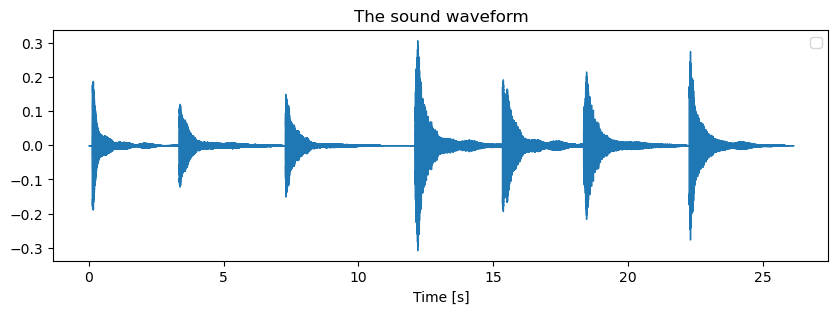

In [ ]:
# Import libraries
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import librosa
import librosa.display
import IPython.display as ipd

# Load audio recording signal
audio_file = 'piano_mix.wav'
#audio_file = 'plion_dream.wav'
sample_rate = 5512
audio_sound, sr = librosa.load(audio_file, sr = sample_rate)

# Display audio
ipd.Audio(audio_sound,rate = sr)

# Plotting the sound's signal waveform
fig, ax = plt.subplots(figsize=(10, 3))
librosa.display.waveshow(audio_sound, sr=sr, ax=ax,x_axis='time')
ax.set(title='The sound waveform', xlabel='Time [s]')
ax.legend()

### Calcul de la Transform√©e de Fourier √† court terme (STFT)

Un signal audio est temporellement variable : ses composantes fr√©quentielles √©voluent au fil du temps. Pour analyser cela, on utilise la STFT (Short-Term Fourier Transform), qui d√©compose le signal en petits segments temporels, puis applique la transform√©e de Fourier sur chaque segment.

La STFT produit des coefficients complexes contenant :
- l‚Äôamplitude (intensit√© des fr√©quences),
- la phase (d√©calage temporel de la fr√©quence).

#### Qu‚Äôest-ce qu‚Äôun spectrogramme ?

Le spectrogramme est une repr√©sentation visuelle du signal audio :

- Colonnes : les diff√©rentes fen√™tres temporelles (√©volution dans le temps),

- Lignes : les diff√©rentes fr√©quences,

- Valeurs : l‚Äô√©nergie des fr√©quences √† chaque moment donn√© (amplitude au carr√© de la STFT).

Le spectrogramme est obtenu en prenant le carr√© du module (ou magnitude) de la STFT :

![Texte alternatif](https://miro.medium.com/v2/resize:fit:448/format:webp/1*qQUehad6mSzVIqPGOmyxxQ.png)

Text(0.5, 1.0, 'Audio spectrogram')

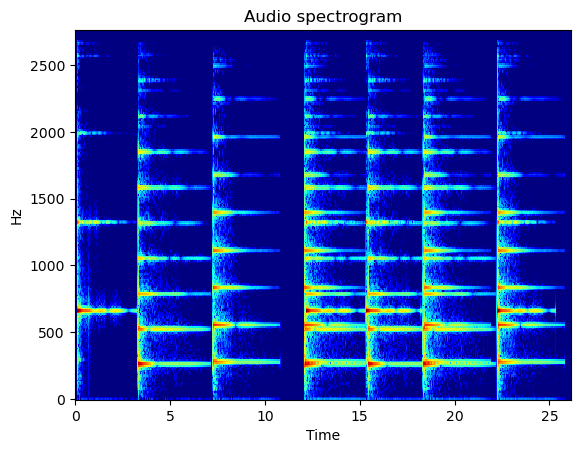

In [ ]:

# Define the hop length
HOP = 256

# Return the complex Short Term Fourier Transform
sound_stft = librosa.stft(audio_sound, n_fft = 512, hop_length = HOP)

# Magnitude Spectrogram
sound_stft_Magnitude = np.abs(sound_stft)

# Phase spectrogram
sound_stft_Angle = np.angle(sound_stft)

#Plot Spectogram
Spec = librosa.amplitude_to_db(sound_stft_Magnitude, ref = np.max)
librosa.display.specshow(Spec,y_axis = 'hz',sr=sr,hop_length=HOP,x_axis ='time',cmap= matplotlib.cm.jet)
plt.title('Audio spectrogram')

#### Utilisation dans la NMF :

![Texte alternatif](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*G8im8-Q5pQTUKx6Yg6AIFg.png)

On va utiliser ce spectrogramme comme matrice de donn√©es V dans l‚Äôalgorithme NMF, car :

- Il repr√©sente bien l‚Äô√©volution fr√©quentielle d‚Äôun signal audio.

- Et surtout, ses valeurs sont toutes positives ou nulles, ce qui respecte la contrainte de non-n√©gativit√© de la NMF.

### Appliquer la Factorisation en Matrices Non-N√©gatives (NMF)

L‚Äôalgorithme de NMF est assez simple √† impl√©menter une fois les r√®gles de mise √† jour d√©riv√©es pour la divergence Œ≤. Il se d√©roule en 3 √©tapes principales :

- Initialiser al√©atoirement les matrices W et H avec des valeurs non n√©gatives.

- Mettre √† jour W et H en gardant l‚Äôautre fixe.

- R√©p√©ter l‚Äô√©tape 2 jusqu‚Äô√† atteindre un seuil de convergence.

### Impl√©mentation :

On commence par d√©finir une fonction de co√ªt bas√©e sur la divergence Œ≤.

Puis on d√©finit une fonction principale pour ex√©cuter l‚Äôalgorithme NMF.

In [ ]:

def divergence(V,W,H, beta = 2):
    
    """
    beta = 2 : Euclidean cost function
    beta = 1 : Kullback-Leibler cost function
    beta = 0 : Itakura-Saito cost function
    """ 
    
    if beta == 0 : return np.sum( V/(W@H) - math.log10(V/(W@H)) -1 )
    
    if beta == 1 : return np.sum( V*math.log10(V/(W@H)) + (W@H - V))
    
    if beta == 2 : return 1/2*np.linalg.norm(W@H-V)

In [ ]:
def NMF(V, S, beta = 2,  threshold = 0.05, MAXITER = 5000): 
    
    """
    inputs : 
    --------
        V         : Mixture signal : |TFST|
        S         : The number of sources to extract
        beta      : Beta divergence considered, default=2 (Euclidean)
        threshold : Stop criterion 
        MAXITER   : The number of maximum iterations, default=1000                                                     
    
    outputs :
    ---------
        W : dictionary matrix [KxS], W>=0
        H : activation matrix [SxN], H>=0
        cost_function : the optimised cost function over iterations
       
   Algorithm : 
   -----------
   
    1) Randomly initialize W and H matrices
    2) Multiplicative update of W and H 
    3) Repeat step (2) until convergence or after MAXITER   
    """
    
    counter = 0
    cost_function = []
    beta_divergence = 1
    
    K, N = np.shape(V)
    
    # Initialisation of W and H matrices : The initialization is generally random
    W = np.abs(np.random.normal(loc=0, scale = 2.5, size=(K,S)))    
    H = np.abs(np.random.normal(loc=0, scale = 2.5, size=(S,N)))

    while beta_divergence >= threshold and counter <= MAXITER:
        
        # Update of W and H
        H *= (W.T@(((W@H)**(beta-2))*V))/(W.T@((W@H)**(beta-1)) + 10e-10)
        W *= (((W@H)**(beta-2)*V)@H.T)/((W@H)**(beta-1)@H.T + 10e-10)
        
        # Compute cost function
        beta_divergence =  divergence(V,W,H, beta = 2)
        cost_function.append( beta_divergence )
        counter += 1
       
    return W,H, cost_function

Text(0, 0.5, 'Beta Divergence for beta = 2 ')

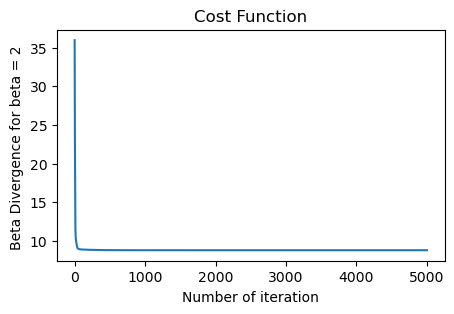

In [ ]:
V = sound_stft_Magnitude + 1e-10
beta = 2
S = 4 

# Applying the NMF function
W, H, cost_function = NMF(V,S,beta = beta, threshold = 0.05, MAXITER = 5000) 

# Ploting the cost function
plt.figure(figsize=(5,3))
plt.plot(cost_function)
plt.title("Cost Function")
plt.xlabel("Number of iteration")
plt.ylabel(f"Beta Divergence for beta = {beta} ")

### Ex√©cution de l‚Äôalgorithme :

On applique l‚Äôalgorithme NMF √† la matrice de donn√©es V (le spectrogramme).

Visualisation des r√©sultats :

- √Ä gauche : les matrices W et H initialis√©es al√©atoirement.

- √Ä droite : W, H et WH apr√®s 5000 it√©rations.

![Texte alternatif](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*Dq5F2lgYJIrD2Tt9GeVCEg.png)

M√™me si le seuil de convergence n‚Äôa pas √©t√© atteint (car il √©tait trop bas), on constate que la fonction de perte (co√ªt) a chut√© drastiquement, ce qui montre une bonne optimisation.

![Texte alternatif](https://miro.medium.com/v2/resize:fit:786/format:webp/1*88xDcb35RxmKQGjNRN-hkA.png)

![Texte alternatif](https://miro.medium.com/v2/resize:fit:720/format:webp/1*o20sX1uVWLnsi5l5es1sCw.png)

### Filtrage des diff√©rentes sources audio

Une fois que l‚Äôalgorithme NMF a converg√©, on peut reconstruire chaque source audio s√©par√©ment.

Pour cela, on utilise :

- la k·µâ colonne de la matrice W (elle repr√©sente le "profil fr√©quentiel" de la source),

- la k·µâ ligne de la matrice H (elle d√©crit l'activation temporelle de cette source).

![Texte alternatif](https://miro.medium.com/v2/resize:fit:152/format:webp/1*OS9KtaY02KwXJQdIbdAloA.png)

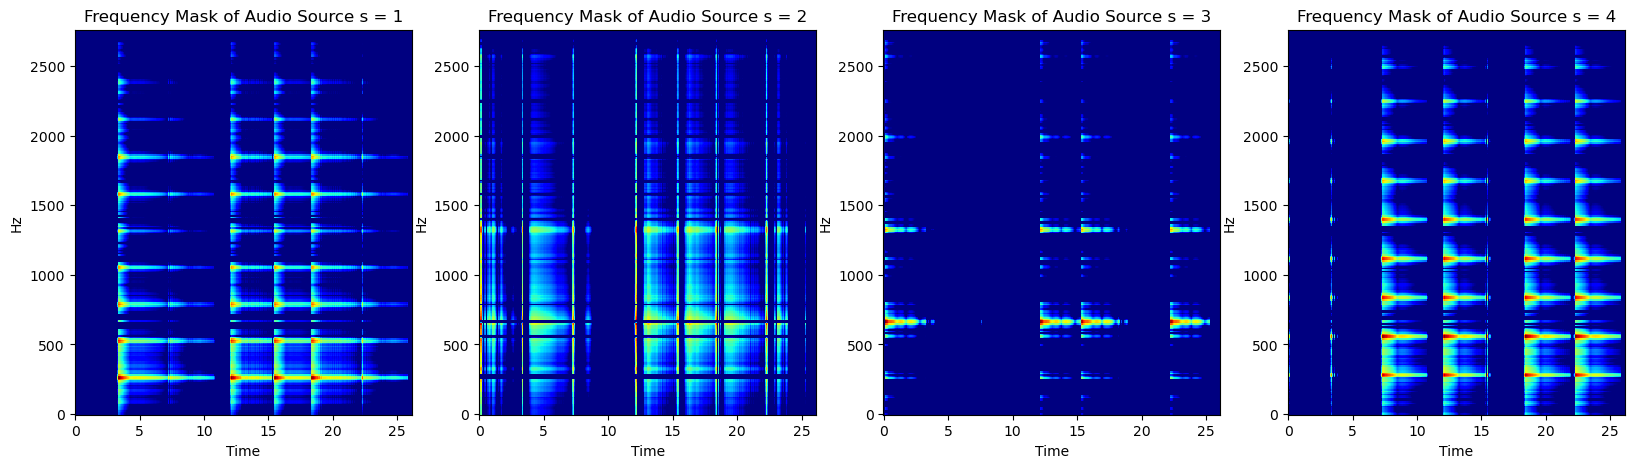

In [ ]:

#After NMF, each audio source S can be expressed as a frequency mask over time
f, axs = plt.subplots(nrows=1, ncols=S,figsize=(20,5))
filtered_spectrograms = []
for i in range(S):
    axs[i].set_title(f"Frequency Mask of Audio Source s = {i+1}") 
    # Filter eash source components
    filtered_spectrogram = W[:,[i]]@H[[i],:]
    # Compute the filtered spectrogram
    D = librosa.amplitude_to_db(filtered_spectrogram, ref = np.max)
    # Show the filtered spectrogram
    librosa.display.specshow(D,y_axis = 'hz', sr=sr,hop_length=HOP,x_axis ='time',cmap= matplotlib.cm.jet, ax = axs[i])
    
    filtered_spectrograms.append(filtered_spectrogram)

![Texte alternatif](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*_l-DgwxnLCDjtZNNvrLHKQ.png)

### Reconstruction des signaux audio extraits

Une fois les sources s√©par√©es dans le spectrogramme, on peut reconstruire les signaux audio complets :

- On r√©cup√®re la phase du signal original (calcul√©e avec la STFT).

- On l‚Äôajoute aux spectrogrammes filtr√©s des sources (car la NMF ne traite que l‚Äôamplitude).

- Puis on applique la transform√©e de Fourier inverse (ISTFT) pour reconstruire le son temporel.

In [ ]:
reconstructed_sounds = []
for i in range(S):
    reconstruct = filtered_spectrograms[i] * np.exp(1j*sound_stft_Angle)
    new_sound   = librosa.istft(reconstruct, n_fft = 512, hop_length = HOP)
    reconstructed_sounds.append(new_sound)

C:\Users\pc\AppData\Local\Temp\ipykernel_22484\3134692246.py:5: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(reconstructed_sounds[i], sr=sr, color = colors[i], ax=ax[i],label=f'Source {i}',x_axis='time')


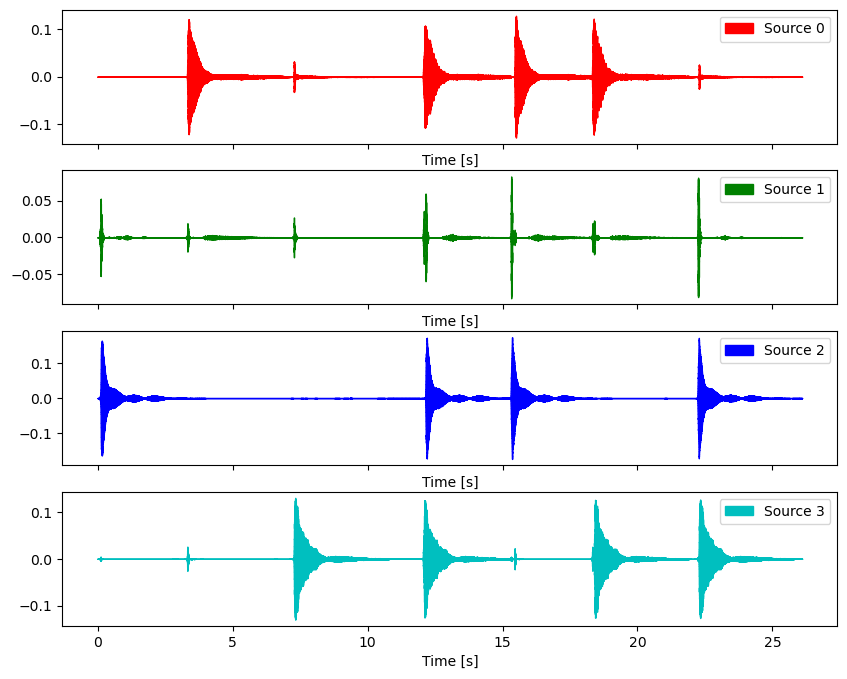

In [ ]:
# Tracing the waveform
colors = ['r', 'g','b', 'c']
fig, ax = plt.subplots(nrows=S, ncols=1, sharex=True, figsize=(10, 8))
for i in range(S):
    librosa.display.waveshow(reconstructed_sounds[i], sr=sr, color = colors[i], ax=ax[i],label=f'Source {i}',x_axis='time')
    ax[i].set(xlabel='Time [s]')
    ax[i].legend()

‚ö†Ô∏è D√©fi : choisir le bon nombre de sources

Un des d√©fis majeurs de l‚Äôutilisation de la NMF pour la s√©paration audio est de choisir le bon nombre de sources S.
- Si S est trop bas, les sons seront mal s√©par√©s.
- Si S est trop √©lev√©, on peut obtenir des artefacts ou des sur-segmentations.

‚û°Ô∏è Une m√©thode consiste √† commencer avec un petit S, puis l‚Äôaugmenter progressivement jusqu‚Äô√† obtenir une s√©paration satisfaisante.

![Texte alternatif](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*GHtwTqjvVgOXkreD7W9VFQ.png)

### üéπ Exemple marquant :

En fixant S=4, le syst√®me a pu extraire le son du marteau du piano (en plus des notes).

Cela montre la capacit√© de la NMF √† isoler non seulement les notes musicales, mais aussi les bruits m√©caniques subtils (comme l‚Äôactivation du marteau de piano).

![Texte alternatif](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*L80DhOCFOggdWejM308_OA.png)

###  Conclusion

La NMF est une m√©thode puissante pour la s√©paration de sources audio, particuli√®rement adapt√©e aux signaux sonores :

- Elle respecte la non-n√©gativit√©, ce qui correspond bien aux propri√©t√©s physiques de l‚Äôaudio.

- Elle est interpr√©table : W = empreintes fr√©quentielles, H = activations temporelles.

- Elle fonctionne m√™me sans apprentissage supervis√©.

In [ ]:
import soundfile as sf

# Download the decomposed sounds
for i in range(S):
    sf.write(f"source_{i+1}.wav", reconstructed_sounds[i], sr)
    ipd.Audio(reconstructed_sounds[i], rate=sr)
